# ACA 3: Opportunity Project Problem 
## AUTHOR: Honglin Zheng, Robert Abrams, Christine Gao, Mina Choi

## Abstract
The students, while underprivileged or from a lower resource community, are also high potential. The project was initiated by a non-profit with the mission of increasing college graduation rates for underprivileged populations. We were asked to identify clusters of universities so the non-profit could better target their outreach when offering their services to the universities. We first researched and decided six variables that were closedly related with the benefits of underprivileged populations. Then we compared the silhouette scores and plots of different n-cluster models. As a result, the most reasonable model is a 2-cluster model with a silhouette score of 0.44. Then we discussed about the result.

# 1. clean data
 ******

### 1.1 choose relevant variables
*Different kinds of universities require different actions to help the minorities. We are going to classify schools based on students' academic ability, students' diversity, cost of attendence, situation of expenditures and federal financial aid funds.*

*For the purpose of improving graduation rate, the column __'C150_4'__ is included to reflect the original value so that we understand which universities demand more help;*

*The column of __'SAT_AVG'__ reflects students' academic ability and intelligence, which is a main factor of graduation;*

*The column of __'COSTT4_A'__ reflects financial burdan of a regular student; the column of __'INEXPFTE'__ and __'NUM4_PUB'__ demonstrate financial aid. These variables are important because financial pressure impacts underprivileged students;*

*The column of __'UGDS_WHITE'__ demonstrate diversity by calculating the percentage of students of color. Diversity affect underpriviledged students in terms of involvement.*

In [1]:
import pandas as pd
original = pd.read_csv("CollegeScorecard.csv")
original.head()

/Users/zhenghonglin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,9,1427,1542,1561,1575,1725,1726,1727,1728) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.443586698337,0.45251396648,0.484818805093,0.406,0.423580786026,0.442452830189,NaN,0.30871831265508,NaN,0.35168556430446
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.732297852901,0.795454545455,0.760521885522,0.755344418052,0.751552795031,0.765074770863,NaN,0.50854980789381,NaN,0.4730923834537
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.600877192982,0.775,0.610465116279,0.686567164179,0.632653061224,0.65,NaN,PrivacySuppressed,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.738341968912,0.85140562249,0.768378650554,0.798440979955,0.778156996587,0.791666666667,NaN,0.47821134615384,NaN,0.49412939796716
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.320016820858,0.380829015544,0.364423717522,0.286530612245,0.315737051793,0.334633385335,NaN,0.25748195545488,NaN,0.29365162671232


In [45]:
col_list = ['INSTNM', 'SAT_AVG', 'CURROPER', 'COSTT4_A', 'INEXPFTE', 'C150_4', 'UGDS_WHITE', 'NUM4_PUB']

In [46]:
#dropping irrelevant columns
original2 = original[col_list]
original2

,INSTNM,SAT_AVG,CURROPER,COSTT4_A,INEXPFTE,C150_4,UGDS_WHITE,NUM4_PUB
0,Alabama A & M University,823.0,1,18888.0,7459.0,0.2914,0.0279,607.0
1,University of Alabama at Birmingham,1146.0,1,19990.0,17208.0,0.5377,0.5987,893.0
2,Amridge University,NaN,1,12300.0,5123.0,0.6667,0.2919,NaN
3,University of Alabama in Huntsville,1180.0,1,20306.0,9352.0,0.4835,0.7012,294.0
4,Alabama State University,830.0,1,17400.0,7393.0,0.2517,0.0161,889.0
...,...,...,...,...,...,...,...,...
7799,Georgia Military College-Columbus Campus,NaN,1,NaN,NaN,NaN,NaN,NaN
7800,Georgia Military College-Valdosta Campus,NaN,1,NaN,NaN,NaN,NaN,NaN
7801,Georgia Military College-Warner Robins Campus,NaN,1,NaN,NaN,NaN,NaN,NaN
7802,Georgia Military College-Online,NaN,1,NaN,NaN,NaN,NaN,NaN


### 1.2 choose meaningful rows

In [47]:
original2.dropna(axis=0, how='any', inplace=True)
original3 = original2[original2.CURROPER != 0]##delete the universities that are not currently open
original3

<ipython-input-47-e80026568525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original2.dropna(axis=0, how='any', inplace=True)


,INSTNM,SAT_AVG,CURROPER,COSTT4_A,INEXPFTE,C150_4,UGDS_WHITE,NUM4_PUB
0,Alabama A & M University,823.0,1,18888.0,7459.0,0.2914,0.0279,607.0
1,University of Alabama at Birmingham,1146.0,1,19990.0,17208.0,0.5377,0.5987,893.0
3,University of Alabama in Huntsville,1180.0,1,20306.0,9352.0,0.4835,0.7012,294.0
4,Alabama State University,830.0,1,17400.0,7393.0,0.2517,0.0161,889.0
5,The University of Alabama,1171.0,1,26717.0,9817.0,0.6665,0.7865,1440.0
...,...,...,...,...,...,...,...,...
5779,University of California-Merced,1010.0,1,30637.0,7586.0,0.5674,0.1526,1175.0
6029,University of South Florida-St Petersburg,1070.0,1,18821.0,5212.0,0.4273,0.6903,431.0
6031,Arizona State University-Downtown Phoenix,1085.0,1,22909.0,9165.0,0.4732,0.5476,406.0
7322,Georgia Regents University,1002.0,1,7715.0,18217.0,0.2935,0.5702,540.0


### 1.3 record and delete universities' names

In [48]:
nameList = original3['INSTNM']
nameList

0                        Alabama A & M University
1             University of Alabama at Birmingham
3             University of Alabama in Huntsville
4                        Alabama State University
5                       The University of Alabama
                          ...                    
5779              University of California-Merced
6029    University of South Florida-St Petersburg
6031    Arizona State University-Downtown Phoenix
7322                   Georgia Regents University
7370                  University of North Georgia
Name: INSTNM, Length: 514, dtype: object

In [49]:
data = original3.drop(['INSTNM', 'CURROPER'], axis = 1)
data

,SAT_AVG,COSTT4_A,INEXPFTE,C150_4,UGDS_WHITE,NUM4_PUB
0,823.0,18888.0,7459.0,0.2914,0.0279,607.0
1,1146.0,19990.0,17208.0,0.5377,0.5987,893.0
3,1180.0,20306.0,9352.0,0.4835,0.7012,294.0
4,830.0,17400.0,7393.0,0.2517,0.0161,889.0
5,1171.0,26717.0,9817.0,0.6665,0.7865,1440.0
...,...,...,...,...,...,...
5779,1010.0,30637.0,7586.0,0.5674,0.1526,1175.0
6029,1070.0,18821.0,5212.0,0.4273,0.6903,431.0
6031,1085.0,22909.0,9165.0,0.4732,0.5476,406.0
7322,1002.0,7715.0,18217.0,0.2935,0.5702,540.0


# 2. fit n-cluster models and compare
 ******

### 2.1 fit 2-cluster model

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

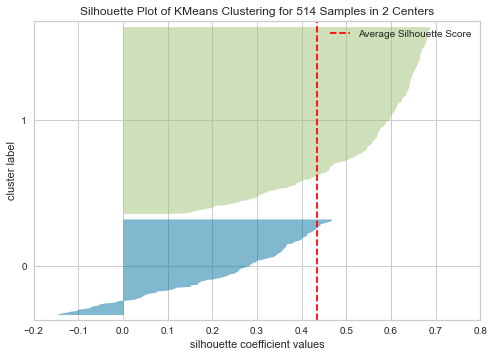

Silhouetter Score of 2-cluster model: 0.4353681287118236


In [51]:
datakmeans2 = KMeans(n_clusters=2)
datakmeans2.fit(data)
cluster_data2 = datakmeans2.predict(data)
silhouette_visualizer(datakmeans2, data, colors='yellowbrick')
silhouetteScore2 = silhouette_score(data, cluster_data2, metric='euclidean')
print('Silhouetter Score of 2-cluster model:', silhouetteScore2)

### 2.2 fit 3-cluster model

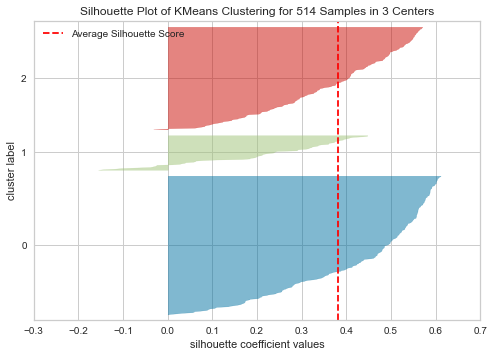

Silhouetter Score of 3-cluster model: 0.38120900619814485


In [52]:
datakmeans3 = KMeans(n_clusters=3)
datakmeans3.fit(data)
cluster_data3 = datakmeans3.predict(data)
silhouette_visualizer(datakmeans3, data, colors='yellowbrick')
silhouetteScore3 = silhouette_score(data, cluster_data3, metric='euclidean')
print('Silhouetter Score of 3-cluster model:', silhouetteScore3)

### 2.3 fit 4-cluster model

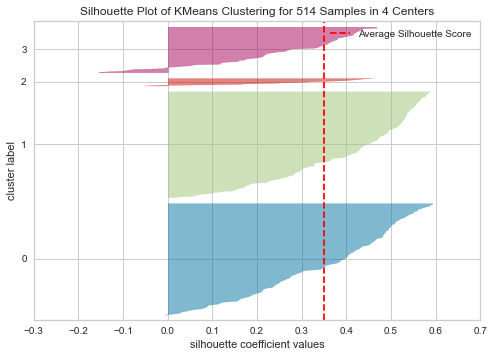

Silhouetter Score of 4-cluster model: 0.3509914989657385


In [53]:
datakmeans4 = KMeans(n_clusters=4)
datakmeans4.fit(data)
cluster_data4 = datakmeans4.predict(data)
silhouette_visualizer(datakmeans4, data, colors='yellowbrick')
silhouetteScore4 = silhouette_score(data, cluster_data4, metric='euclidean')
print('Silhouetter Score of 4-cluster model:', silhouetteScore4)

### 2.4 fit 5-cluster model

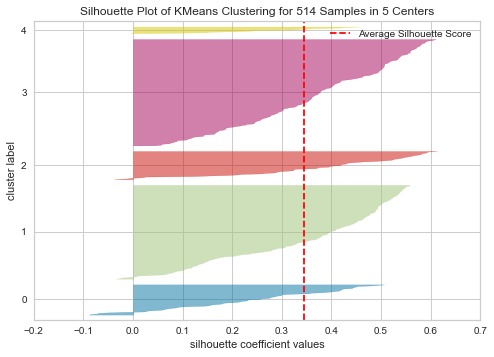

Silhouetter Score of 5-cluster model: 0.34514884909787097


In [54]:
datakmeans5 = KMeans(n_clusters=5)
datakmeans5.fit(data)
cluster_data5 = datakmeans5.predict(data)
silhouette_visualizer(datakmeans5, data, colors='yellowbrick')
silhouetteScore5 = silhouette_score(data, cluster_data5, metric='euclidean')
print('Silhouetter Score of 5-cluster model:', silhouetteScore5)

### 2.5 analysis result
*cluster_n = 2 is the most reasonable classification for the reason that silhouetter score is 0.44*

## 3. create a new dataframe to contain the clustering result

In [55]:
result = data.copy(deep=True)
result['university name'] = nameList
result['cluster'] = cluster_data2

result

,SAT_AVG,COSTT4_A,INEXPFTE,C150_4,UGDS_WHITE,NUM4_PUB,university name,cluster
0,823.0,18888.0,7459.0,0.2914,0.0279,607.0,Alabama A & M University,1
1,1146.0,19990.0,17208.0,0.5377,0.5987,893.0,University of Alabama at Birmingham,0
3,1180.0,20306.0,9352.0,0.4835,0.7012,294.0,University of Alabama in Huntsville,1
4,830.0,17400.0,7393.0,0.2517,0.0161,889.0,Alabama State University,1
5,1171.0,26717.0,9817.0,0.6665,0.7865,1440.0,The University of Alabama,0
...,...,...,...,...,...,...,...,...
5779,1010.0,30637.0,7586.0,0.5674,0.1526,1175.0,University of California-Merced,0
6029,1070.0,18821.0,5212.0,0.4273,0.6903,431.0,University of South Florida-St Petersburg,1
6031,1085.0,22909.0,9165.0,0.4732,0.5476,406.0,Arizona State University-Downtown Phoenix,0
7322,1002.0,7715.0,18217.0,0.2935,0.5702,540.0,Georgia Regents University,1


In [56]:
result.groupby('cluster').mean()

,SAT_AVG,COSTT4_A,INEXPFTE,C150_4,UGDS_WHITE,NUM4_PUB
cluster,,,,,,
0,1109.827586,23863.005747,12054.436782,0.625892,0.631829,1250.051724
1,1001.217647,17858.455882,7217.832353,0.428773,0.582861,883.714706


In [57]:
result.groupby('cluster').count()

,SAT_AVG,COSTT4_A,INEXPFTE,C150_4,UGDS_WHITE,NUM4_PUB,university name
cluster,,,,,,,
0,174,174,174,174,174,174,174
1,340,340,340,340,340,340,340


## 4. discussion
*According to the analysis, we are going to divide the 514 universities into two groups.*

*A total of 340 universities are included in the first group, which is called __difficult group__. They have fewer white students, lower SAT scores, lower graduation rate, lower benefit from expenditures and federal financial aid. Therefore, this group requires more help.*

*A total of 174 univerisities are included in the second group, which is called __easy group__. They are comparatively not urgent to acquire assisstance.*

### Contribution
- discussion: Robert, Christine, Honglin, Mina
- code in R: Robert
- code in Python: Honglin

In [60]:
import os

os.system('jupyter nbconvert --to html ACA3.ipynb')

0